## Урок 3. Домашнее задание

### 3.1 Задание среднего уровня.

В домашней работе предлагается применить PCA трехмерным данным по оттоку, которые содержатся в файле `data/client_segmentation.csv`. В файле содержится информация по клиентам оператора связи о том, как изменилось потребление услуг оператора за два месяца:
* call_diff доля звонков
* sms_diff доля смс
* доля интернет-трафика traffic_diff

Все показатели вычисляются по формуле

$$
\frac{\text{new_value}-\text{old_value}}{\text{old_value}}
$$

В последней колонке customes_class содержится метка по оттоку:
* $0$ - активный пользователя
* $1$ - "спящий" пользователь (редко пользуется услугами)
* $2$ - пользователь, который ушел в отток

Получается у нас три фичи (датасет трёхмерный) и задача классификации на три класса.

загружаем датасет в память

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
df_source = pd.read_csv('client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head()

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0


**В рамках домашнего задания**

1. Визуализируйте первый и третий столбец из набора данных `call_diff` и`traffic_diff` в виде scatter
2. Постройте PCA  сожмите их до одномерного случая, визуализируйте результат


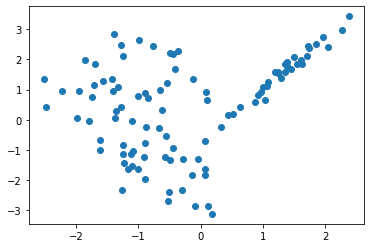

In [18]:
# -- ВАШ КОД ТУТ --
from sklearn.decomposition import PCA

plt.scatter(df_source['call_diff'], df_source['traffic_diff'])
X_old = df_source[['call_diff','traffic_diff']]
pca = PCA(n_components=1).fit(X_old)
X_new = pca.transform(X_old)
X_new_plot = pca.inverse_transform(X_new)

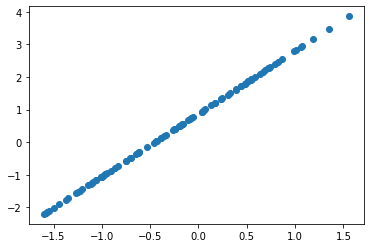

In [20]:
plt.scatter(X_new_plot[:,0], X_new_plot[:,1])

### 3.2 Задание высокого уровня

Сжимать двумерные данные не очень интересно, давайте попробуем применить PCA к трёхмерному датасету и сжать данные до размерности $n=2$.

Для наглядности и визуализируем наши трёхмерные данные в 3D:

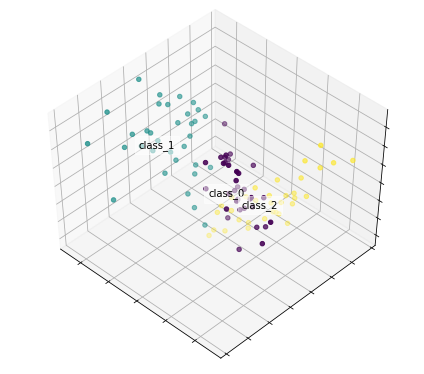

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
# и визуализируем их
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134); plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([])
plt.show()

С помощью класса `sklearn.decomposition.PCA` выполните понижение размерности признакового пространства  с $n=3$ до $n=2$ и снова визуализируйте данные. Картинка должна получится примерно такая:
![classification_dim_reduction](https://248006.selcdn.ru/public/DS.%20Block%202.%20M8/classification_dim_reduction.png)

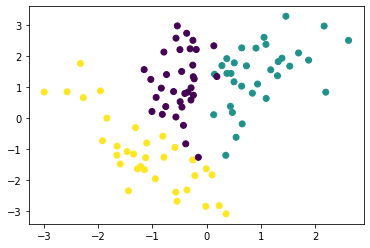

In [30]:
# -- ВАШ КОД ТУТ --
X = df_source[['call_diff','traffic_diff','sms_diff']]
an_pca = PCA(n_components=2).fit(X)
X_new = an_pca.transform(X)
X_new_plot = an_pca.inverse_transform(X_new)
plt.scatter(X_new_plot[:,0], X_new_plot[:,1], c=df_source['customes_class'])

В этом уроке мы научились применять алгоритм PCA  понизили размерность датасета с $n=2$ до $n=1$.

В следующем уроке мы реализуем алгоритм PCA на языке python по шагам.

## Урок 6. Домашнее задание 

### 6.1 Задание начального уровня

**Задание просто уровня** Дана матрица $A$, вычислите SVD разложение с помощью функции `numpy.linalg.svd`. Найдите [определитель](https://ru.wikipedia.org/wiki/Определитель ) матрицы $U$ с помощью функции `numpy.linalg.det`. Чему равен определитель?

In [34]:
from numpy.linalg import svd, det

A = np.array([[3,2,2],[2,3,-2]])

# -- ВАШ КОД ТУТ --
U, S, Vh = svd(A)
print(svd(A))
print(U)
print(det(U))

(array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]), array([5., 3.]), array([[ 7.07106781e-01,  7.07106781e-01,  3.88578059e-16],
       [-2.35702260e-01,  2.35702260e-01, -9.42809042e-01],
       [-6.66666667e-01,  6.66666667e-01,  3.33333333e-01]]))
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
0.9999999999999997


## 6.2 Задание высокого уровня

В домашней работе предлагаю Вам немного поработать с изображениями (похожий трюк можно увидеть в этой [статье на хабре](https://habr.com/ru/post/275273/)). Для этого нужно установить модуль Pillow (если у вас Анаконда, то https://anaconda.org/anaconda/pillow)

<pre>
pip install Pillow
</pre>

Загрузим картинку в трёхмерный *numpy array* и отобразим её прямо в jupyter notebook.

<class 'numpy.ndarray'> (380, 509, 3)


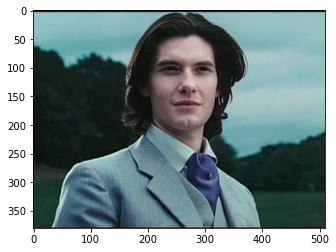

In [37]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
img = mpimg.imread('dorian_grey.png')
print(type(img),img.shape)
imshow(img)
plt.show()

##### У нас трёхмерный массив, где третье измерение соответствует цветовой компоненте rgb. Цветную картинку можно преобразовать в двумерную серую (grayscale) с помощью формулы, которую я нашёл [тут](https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python) 

<class 'numpy.ndarray'> (380, 509)


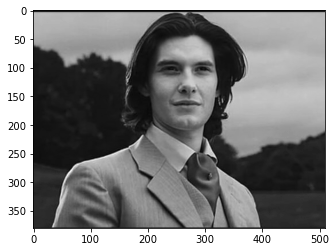

In [39]:
def rgb2gray(rgb):
    ''' Берётся среднее трёх цветов RGB'''
    tile = np.tile(np.c_[0.333, 0.333, 0.333], reps=(rgb.shape[0],rgb.shape[1],1))
    return np.sum(tile * rgb, axis=2)

img_gray = rgb2gray(img)
print(type(img_gray), img_gray.shape)
imshow(img_gray, cmap = "gray")
plt.show()

#### Далее 

* обучите на массиве *img_gray* размерности $894 \times 588$ класс TruncatedSVD c параметром n_components=5
* получите матрицу *img_gray_svd* с помощью функции `transform`
* получите массив *img_gray_svd_restored* с помощью функции `inverse_transform`
* визуализируйте массив *img_gray_svd_restored* с помощью функции *imshow*

Этот алгоритм демонстрирует, как происходит сжатие данных большой размерности. А результате у вас должна получится фотка как бы в очень нечётком виде

![grey_pca.png](https://248006.selcdn.ru/public/DS.%20Block%202.%20M8/grey_pca.png)

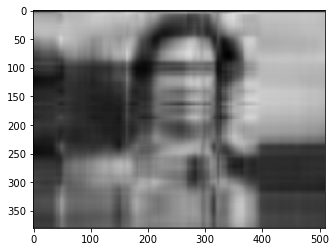

In [41]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=5).fit(img_gray)
img_gray_svd = svd_model.transform(img_gray)
img_gray_svd_restored = svd_model.inverse_transform(img_gray_svd)

imshow(img_gray_svd_restored, cmap = "gray")

##### В этом уроке мы познакомились с таким способом снижения размерности, как PCA. Оба метода которые мы же значем выполняют сжатие как линейное преобразование. В следующем уроке рассмотрим нелинейное сжатие

## Урок 8. Домашнее задание 
### 8.1 Задание высокого уровня

Давайте проверим, как t-sne может улучшить Ваши модели. Для начала загрузим данные и построим Baseline модель без преобразования входных данных

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def eval_model(input_x, input_y):
    """Обучаем и валидируем модель"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=y, random_state=42
    )
    # Для примера возьмём неглубокое дерево решений
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc_score = accuracy_score(y_test, preds.argmax(axis=1))
    print('Accuracy: %.5f' % acc_score)
    
df_source = pd.read_csv('client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

#### Вычисляем скор baseline модели (по тестовым данным)

In [44]:
eval_model(X, y)

Accuracy: 0.80000


##### Алгоритм выполнения домашней работы:

* выполните PCA преобразование матрицы $X$, передайте новую матрицу в `eval_model`. Какое значение Accuracy получили?
* выполните t-sne преобразование матрицы $X$, передайте новую матрицу в `eval_model`. Какое значение Accuracy получили?

Какие выводы можно сделать?

##### В этом уроке мы познакомились с новым алгоритмом t-SNE. Какие у него есть недостатки?

* требует бережной настройки параметров на валидационной выборке (см. документацию - там очень много параметров)
* плохо работает, когда данных очень много.

На больших объёмах данных (более 10к элементов) следует применять более простые алгоритмы - PCA или SVD.

In [56]:
for i in [1,2]: #у нас 3 фичи, поэтому посмотрим два варианта
    new_pca = PCA(n_components=i).fit(X)
    X_new = new_pca.transform(X)
    X_new_plot = new_pca.inverse_transform(X_new)
    eval_model(X_new_plot, y)

Accuracy: 0.80000
Accuracy: 0.80000


In [57]:
from sklearn.manifold import TSNE
for i in [1,2]:
    tsne_transformer = TSNE(n_components=i)
    new_X = tsne_transformer.fit_transform(X)
    eval_model(new_X, y)

Accuracy: 0.86667
Accuracy: 0.96667


#####  Предположу, что в исходной матрице Х зависимость фичей была не линейной,более сложной, возможно одна часть значений близка к линейному, другая - нет. PCA для двух случаев дала одинаковую оценку, что может говорить о двух парах зависимостей фичей как я предположил т.е. фичи 1 и 2, 2 и 3 частично линейно зависимы, частично нет, фичи 1 и 3 какая-либо более сложная зависимость чем линейная. А TNSE молодец, хорошо сжал данные:)